In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras

2025-05-18 11:30:19.343380: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747567819.536867      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747567819.592289      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_train[0]

9

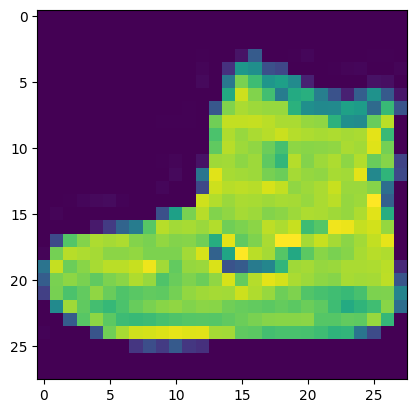

In [7]:
plt.imshow(X_train[0])

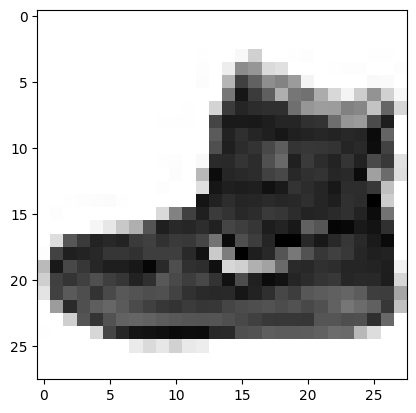

In [8]:
plt.imshow(X_train[0],cmap = 'Greys')

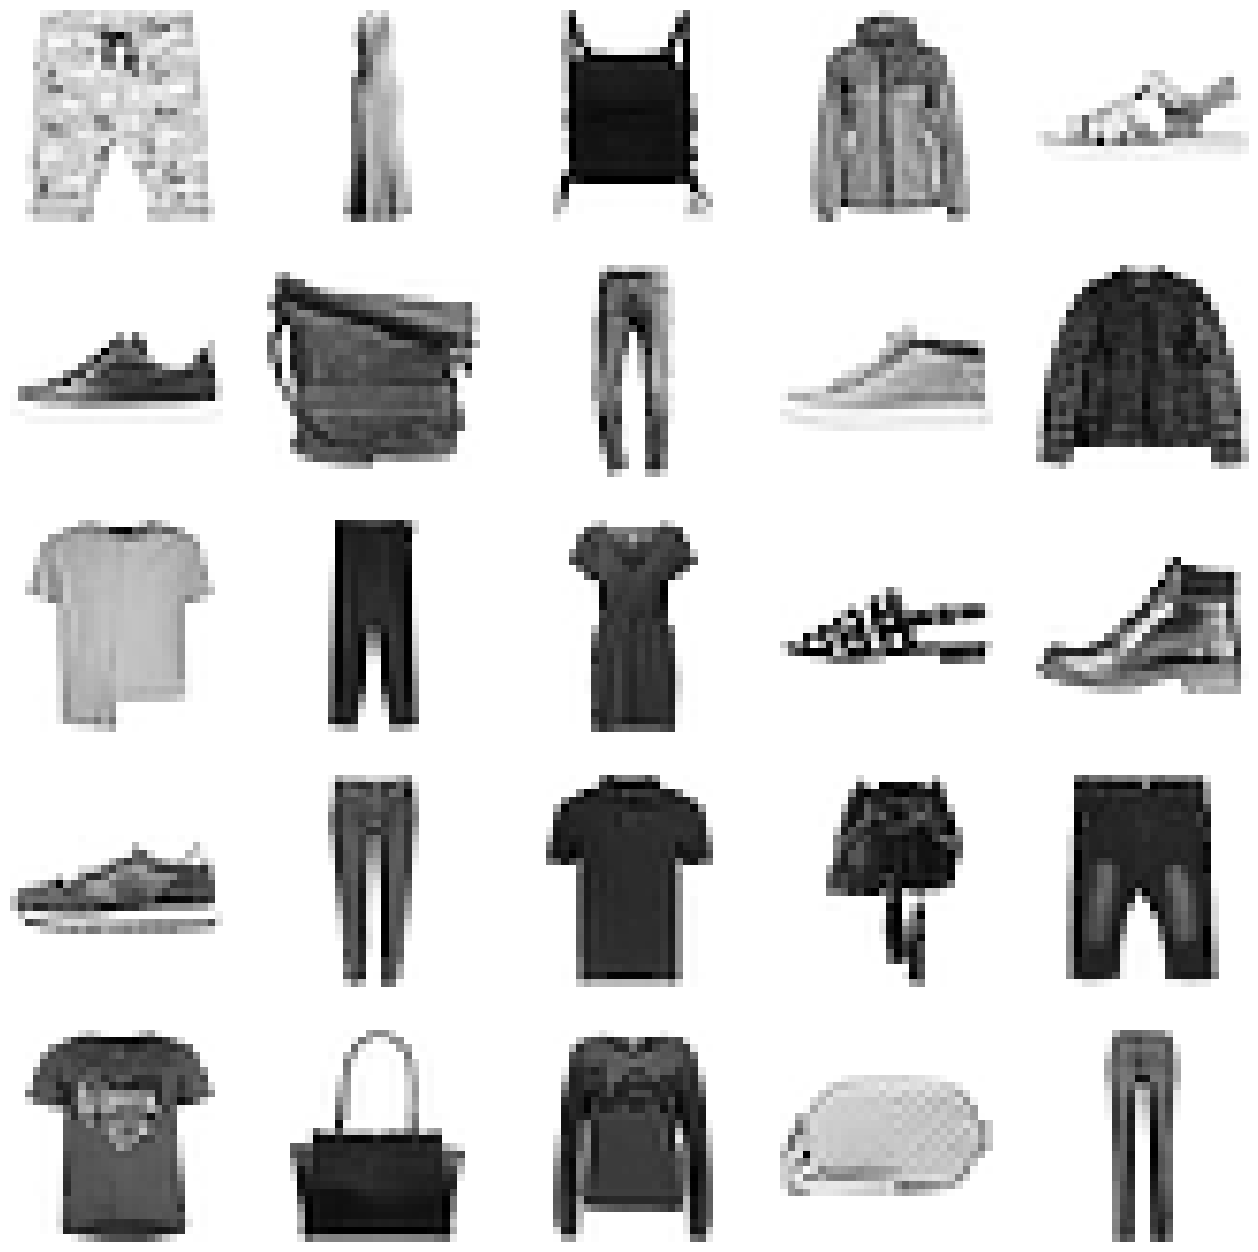

In [9]:
plt.figure(figsize = (16,16))

j = 1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j); j+= 1
    plt.imshow(X_train[i],cmap = "Greys")
    plt.axis('off')
    # plt.title(f"{class_labels[y_train[i]]}/{y_train[i]}")

Change dimension

In [10]:
X_train.ndim

3

In [11]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [12]:
X_train.ndim

4

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2, random_state =2020)

In [16]:
X_train.shape

(48000, 28, 28, 1)

## CNN

In [17]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747567834.627397      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1747567834.628280      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
X_train.shape

(48000, 28, 28, 1)

In [21]:
history = model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10


I0000 00:00:1747567837.835717      95 service.cc:148] XLA service 0x7ea59c012360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747567837.836214      95 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1747567837.836240      95 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1747567838.034030      95 cuda_dnn.cc:529] Loaded cuDNN version 90300


30/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5652 - loss: 1.4199

I0000 00:00:1747567839.904464      95 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.6964 - loss: 0.9588 - val_accuracy: 0.8496 - val_loss: 0.4301
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8626 - loss: 0.3949 - val_accuracy: 0.8748 - val_loss: 0.3659
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8799 - loss: 0.3438 - val_accuracy: 0.8808 - val_loss: 0.3416
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8896 - loss: 0.3093 - val_accuracy: 0.8923 - val_loss: 0.3138
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8988 - loss: 0.2841 - val_accuracy: 0.8813 - val_loss: 0.3340
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9041 - loss: 0.2721 - val_accuracy: 0.8898 - val_loss: 0.3086
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9082 - loss: 0.2541 - val_accuracy: 0.8939 - val_loss: 0.3013
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9139 - loss: 0.2409 - val_accuracy: 0.8967 - val_loss: 0.2952
Ep

In [22]:
history.history

{'accuracy': [0.7901041507720947,
  0.8666666746139526,
  0.8823124766349792,
  0.8922500014305115,
  0.89864581823349,
  0.9049583077430725,
  0.9098958373069763,
  0.914020836353302,
  0.9165833592414856,
  0.9221458435058594],
 'loss': [0.6319577097892761,
  0.38330143690109253,
  0.3347921669483185,
  0.30511483550071716,
  0.2832711935043335,
  0.26783487200737,
  0.2512071430683136,
  0.2392594814300537,
  0.23109979927539825,
  0.2178831845521927],
 'val_accuracy': [0.8495833277702332,
  0.874833345413208,
  0.8808333277702332,
  0.8922500014305115,
  0.8812500238418579,
  0.8897500038146973,
  0.893916666507721,
  0.8967499732971191,
  0.8945833444595337,
  0.9073333144187927],
 'val_loss': [0.4301464557647705,
  0.3659360706806183,
  0.34164682030677795,
  0.31381627917289734,
  0.33397650718688965,
  0.30859777331352234,
  0.30133089423179626,
  0.2951579689979553,
  0.29758694767951965,
  0.2715297341346741]}

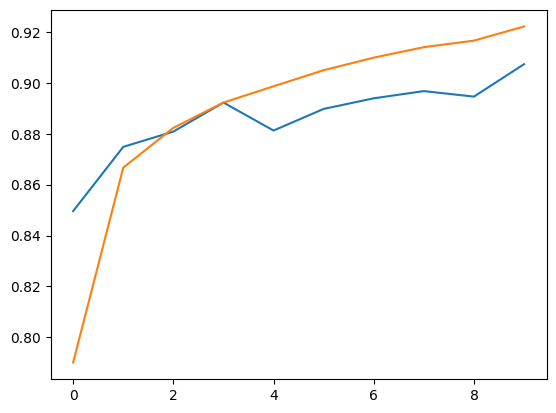

In [23]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

In [24]:
## Test

In [25]:
model.predict(np.expand_dims(X_test[0],axis = 0)).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.97]],
      dtype=float32)

In [26]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


9

In [27]:
y_pred = model.predict(X_test).round(2)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.3 , 0.03, 0.01]], dtype=float32)

In [28]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9050 - loss: 0.2775


[0.27515509724617004, 0.9016000032424927]

In [29]:
## Visulaise oupt

<Axes: >

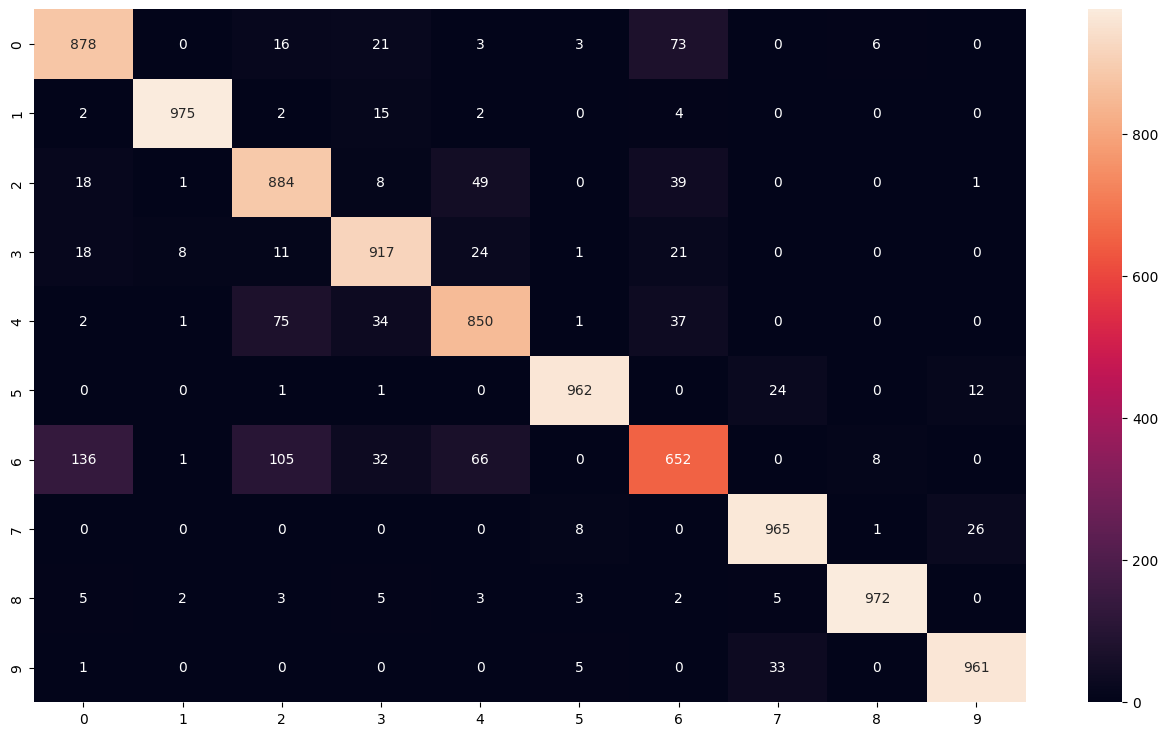

In [30]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)

sns.heatmap(cm,annot=True,fmt='d')

In [31]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred_labels)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.88      0.84      1000
           3       0.89      0.92      0.90      1000
           4       0.85      0.85      0.85      1000
           5       0.98      0.96      0.97      1000
           6       0.79      0.65      0.71      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [32]:
model.save('/kaggle/working/fashion_classification_cnn_model.h5')

In [33]:
keras.__version__


'3.5.0'

In [35]:
tf.__version__


NameError: name 'tf' is not defined

In [36]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [37]:
model.save("/kaggle/working/cnn_model.keras")